## Exploratory Data Analysis (EDA) on the dataset of Price Prediction of Uber and Lyft

### Importing the libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

### Loading the data

In [2]:
data= pd.read_csv("cab_rides.csv")
data.head()

,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,id,product_id,name
0,0.44,Lyft,1544952607890,North Station,Haymarket Square,5.0,1.0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,lyft_line,Shared
1,0.44,Lyft,1543284023677,North Station,Haymarket Square,11.0,1.0,4bd23055-6827-41c6-b23b-3c491f24e74d,lyft_premier,Lux
2,0.44,Lyft,1543366822198,North Station,Haymarket Square,7.0,1.0,981a3613-77af-4620-a42a-0c0866077d1e,lyft,Lyft
3,0.44,Lyft,1543553582749,North Station,Haymarket Square,26.0,1.0,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,lyft_luxsuv,Lux Black XL
4,0.44,Lyft,1543463360223,North Station,Haymarket Square,9.0,1.0,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,lyft_plus,Lyft XL


### Checking the missing values

In [3]:
data.isnull().sum()

distance                0
cab_type                0
time_stamp              0
destination             0
source                  0
price               55095
surge_multiplier        0
id                      0
product_id              0
name                    0
dtype: int64

#### The 'price' column has more than 50000 missing values.

### Imputation with mean value of price

In [4]:
for i in ["price"]:
    data.loc[data.loc[:,i].isnull(),i] = data.loc[:,i].mean()
data.price.isnull().sum()

0

### Removing the columns 'id' and 'product_id'

In [5]:
data= data.drop(["id", "product_id"], axis= 1)
data.head()

,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,name
0,0.44,Lyft,1544952607890,North Station,Haymarket Square,5.0,1.0,Shared
1,0.44,Lyft,1543284023677,North Station,Haymarket Square,11.0,1.0,Lux
2,0.44,Lyft,1543366822198,North Station,Haymarket Square,7.0,1.0,Lyft
3,0.44,Lyft,1543553582749,North Station,Haymarket Square,26.0,1.0,Lux Black XL
4,0.44,Lyft,1543463360223,North Station,Haymarket Square,9.0,1.0,Lyft XL


### Converting the timestamp into datetime and further converting datetime into time, date,hour, day and time of day

In [6]:
#https://www.codegrepper.com/code-examples/python/convert+timestamp+to+datetime+python+dataframe
data["date_time"]= pd.to_datetime(data["time_stamp"]/1000, unit= 's')
data["time"]= data["date_time"].dt.time

#data["hour"]= data["time"].apply(lambda time: time.hour)
data["date"]= data["date_time"].dt.date
data["hour"]= data["date_time"].dt.hour
data["day"] = data["date_time"].dt.day_name()
data.loc[(data.hour >= 6) & (data.hour < 12) , 'time_of_day'] = 'Morning'
data.loc[(data.hour >= 12) & (data.hour < 15) , 'time_of_day'] = 'Afternoon'
data.loc[(data.hour >= 15) & (data.hour < 18) , 'time_of_day'] = 'Evening'
data.loc[(data.hour >= 18) | (data.hour < 6) , 'time_of_day'] = 'Night'


data.head()


,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,name,date_time,time,date,hour,day,time_of_day
0,0.44,Lyft,1544952607890,North Station,Haymarket Square,5.0,1.0,Shared,2018-12-16 09:30:07.890000105,09:30:07.890000,2018-12-16,9,Sunday,Morning
1,0.44,Lyft,1543284023677,North Station,Haymarket Square,11.0,1.0,Lux,2018-11-27 02:00:23.677000046,02:00:23.677000,2018-11-27,2,Tuesday,Night
2,0.44,Lyft,1543366822198,North Station,Haymarket Square,7.0,1.0,Lyft,2018-11-28 01:00:22.197999954,01:00:22.197999,2018-11-28,1,Wednesday,Night
3,0.44,Lyft,1543553582749,North Station,Haymarket Square,26.0,1.0,Lux Black XL,2018-11-30 04:53:02.749000072,04:53:02.749000,2018-11-30,4,Friday,Night
4,0.44,Lyft,1543463360223,North Station,Haymarket Square,9.0,1.0,Lyft XL,2018-11-29 03:49:20.223000050,03:49:20.223000,2018-11-29,3,Thursday,Night


### Total number of Cabs based on cab type

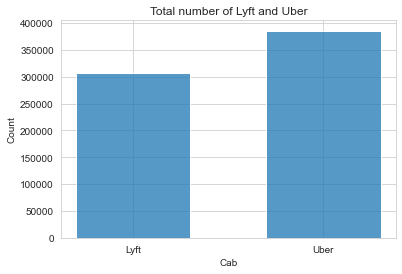

In [34]:
sns.histplot(data= data, x= "cab_type", shrink= 0.6, binwidth= 3)
plt.xlabel("Cab")
plt.title("Total number of Lyft and Uber")
plt.show()

#### Plot Summary - Total number of Uber is higher than the total number of Lyft  

### Finding how many cabs are available at each Source

In [7]:
#https://stackoverflow.com/questions/39778686/pandas-reset-index-after-groupby-value-counts
sourc = pd.DataFrame(data.groupby('source').size().reset_index())
sourc.columns = ['source','number_of_cabs']
print(sourc)

                     source  number_of_cabs
0                  Back Bay           57792
1               Beacon Hill           57403
2         Boston University           57764
3                    Fenway           57757
4        Financial District           58857
5          Haymarket Square           57736
6                 North End           57763
7             North Station           57118
8   Northeastern University           57756
9             South Station           57750
10         Theatre District           57813
11                 West End           57562


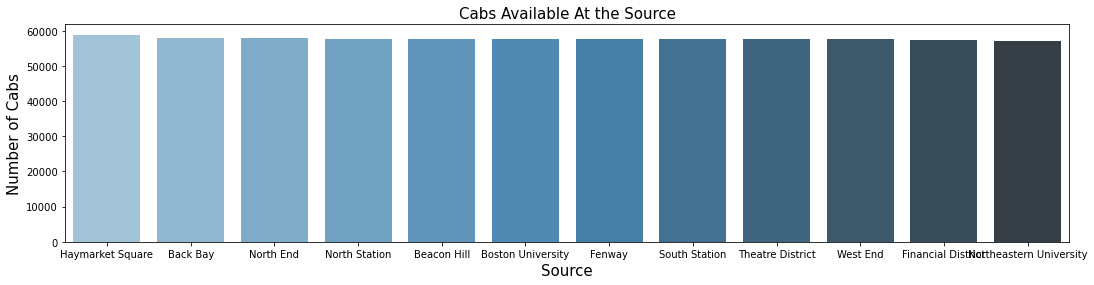

In [8]:
df= data["source"].unique()
#print(df)
a= pd.Series(list(data["source"]))
v= a.value_counts()
#print(v)
df_count= [x for x in v]

plt.figure(figsize=(18,4))
sns.barplot(x= df,y= df_count,palette = 'Blues_d')
plt.xlabel("Source", fontsize= 15)
plt.ylabel("Number of Cabs", fontsize= 15)
plt.title("Cabs Available At the Source", fontsize= 15)
plt.show()

#### Plot Summary - Number of cabs available at Financial District is the highest. There is no significant difference in cab availability at each source. 

### Availability of Uber Daywise 

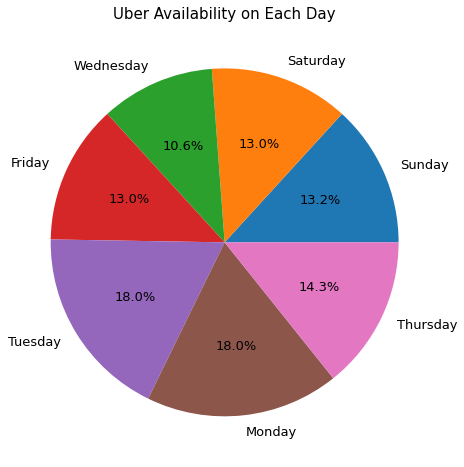

In [11]:
#https://stackoverflow.com/questions/36684013/extract-column-value-based-on-another-column-pandas-dataframe
uber_name = data.loc[data["cab_type"]=="Uber", "day"]
lists = list(uber_name)
values = []
sets = set(uber_name)
label = list(sets)

for i in sets:
    d= lists.count(i)
    values.append(d)
#https://stackoverflow.com/questions/7082345/how-to-set-the-labels-size-on-a-pie-chart-in-python
plt.figure(figsize=(10,8))
plt.pie(values,labels= label, autopct= '%1.1f%%', textprops={'fontsize': 13})
plt.title("Uber Availability on Each Day", fontsize = 15)
plt.show()

### Availability of Lyft Daywise

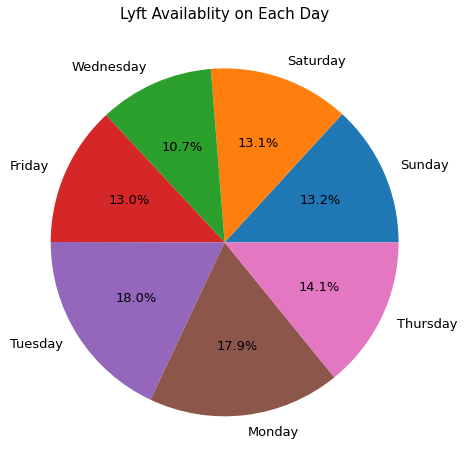

In [12]:
#https://stackoverflow.com/questions/36684013/extract-column-value-based-on-another-column-pandas-dataframe
lyft_name = data.loc[data["cab_type"]=="Lyft", "day"]
lists = list(lyft_name)
value = []
sets = set(lyft_name)
label = list(sets)

for i in sets:
    d= lists.count(i)
    value.append(d)
#https://stackoverflow.com/questions/7082345/how-to-set-the-labels-size-on-a-pie-chart-in-python
plt.figure(figsize=(10,8))
plt.pie(value,labels= label, autopct= '%1.1f%%', textprops={'fontsize': 13})
plt.title("Lyft Availablity on Each Day", fontsize = 15)
plt.show()

#### Plot Summary - Both Uber and Lyft are available mostly on Monday and Tuesday.

### Distribution of Price

In [8]:
#https://www.analyticsvidhya.com/blog/2020/03/groupby-pandas-aggregating-data-python/
df = pd.DataFrame(data.groupby('name', as_index=False).agg(average_price = ("price",np.mean)))
df.columns = ["cabs_name", "average_price"]
print(df)

       cabs_name  average_price
0          Black      20.523786
1      Black SUV      30.286763
2            Lux      17.771240
3      Lux Black      23.062468
4   Lux Black XL      32.324086
5           Lyft       9.610885
6        Lyft XL      15.309363
7         Shared       6.029893
8           Taxi      16.545125
9       UberPool       8.752500
10         UberX       9.765074
11        UberXL      15.678144
12           WAV       9.765019


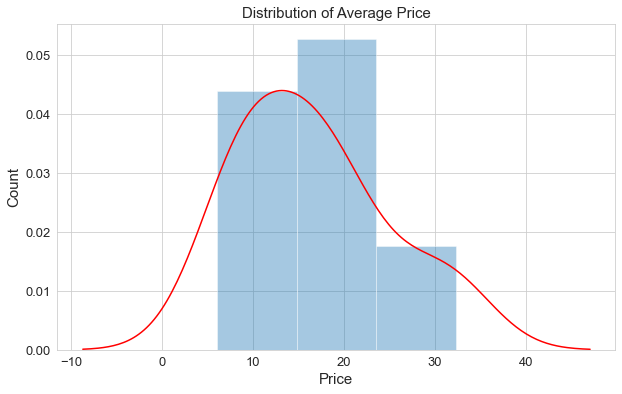

In [9]:
plt.figure(figsize=(10,6))
sns.set_style("whitegrid")
sns.distplot(df.average_price,kde_kws = {"color" : "red"})
plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)
plt.xlabel("Price", fontsize= 15)
plt.ylabel("Count",fontsize=15)
plt.title("Distribution of Average Price",fontsize=15)
plt.show()

#### Plot Summary - Most of the cabs have average price range of 10-20. 

### Finding number of cabs available at different times of a day

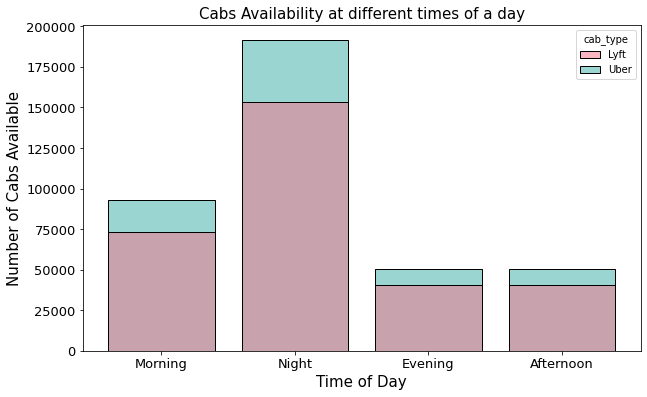

In [14]:
plt.figure(figsize=(10,6))
sns.histplot(data=data, x= "time_of_day", hue="cab_type", shrink=0.8,palette = 'husl')
plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)
plt.xlabel("Time of Day", fontsize = 15)
plt.ylabel("Number of Cabs Available", fontsize = 15)
plt.title("Cabs Availability at different times of a day", fontsize = 15)
plt.show()

#### Plot Summary - Cabs availability is the highest during the night time. The availability is comparatively lower during the evening and afternoon. 

### Price variation with Distance

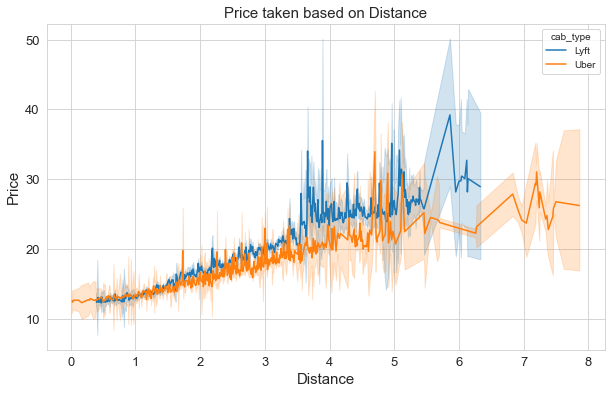

In [16]:
plt.figure(figsize=(10,6))
sns.lineplot(x="distance",y="price", hue="cab_type", data= data)
plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)
plt.xlabel("Distance",fontsize= 15)
plt.ylabel("Price",fontsize=15)
plt.title("Price taken based on Distance",fontsize=15)
plt.show()

#### Plot Summary - Price for Uber is higher for a distance of about 5-6. Price for Lyft is higher for a distance of about 3-5.

### Distance travelled by Lyft and Uber in each Hour

In [17]:
uber= data[data["cab_type"]=="Uber"]
lyft= data[data["cab_type"]=="Lyft"]

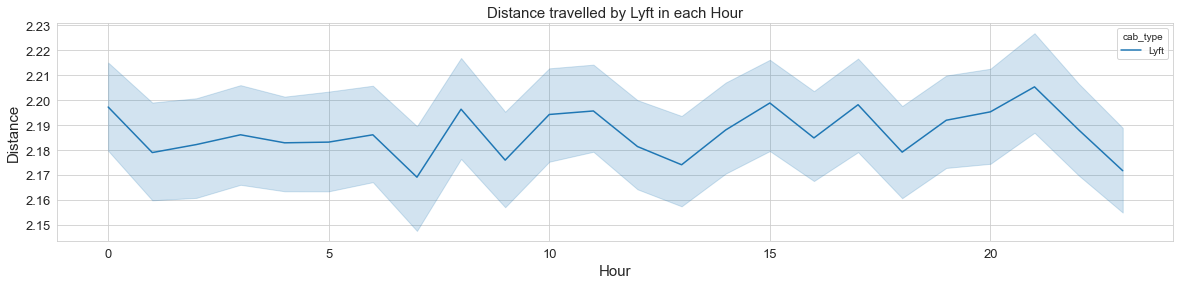

In [18]:
plt.figure(figsize=(20,4))
sns.lineplot(x="hour", y="distance", data= lyft, hue= "cab_type")
plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)
plt.xlabel("Hour",fontsize=15)
plt.ylabel("Distance",fontsize=15)
plt.title("Distance travelled by Lyft in each Hour",fontsize=15)
plt.show()

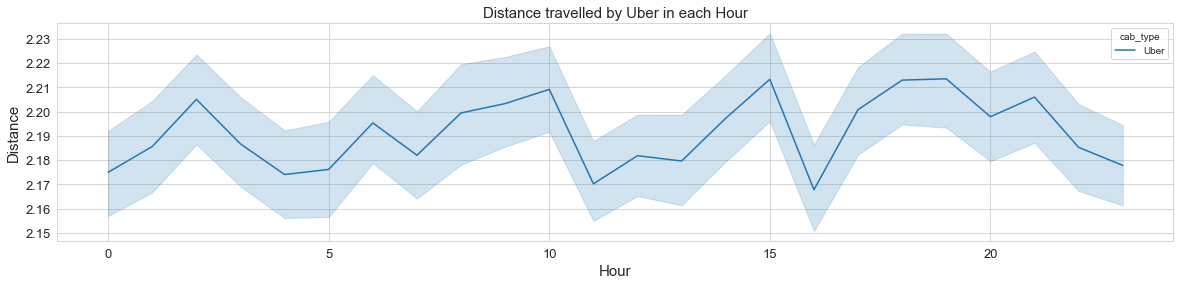

In [19]:
plt.figure(figsize=(20,4))
sns.lineplot(x="hour", y="distance", data= uber, hue= "cab_type")
plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)
plt.xlabel("Hour",fontsize=15)
plt.ylabel("Distance",fontsize=15)
plt.title("Distance travelled by Uber in each Hour",fontsize=15)
plt.show()

#### Plot Summary - Lyft covers maximum distance at hour = 21. Maximum distance is covered by Uber at hour of about 15 and within the hour range of 18-19. Least distance is covered by Uber at an hour value of 16.

### Price variation with Hour

In [22]:
uber= data[data["cab_type"]=="Uber"]
lyft= data[data["cab_type"]=="Lyft"]
data["log_price"] = np.log(data["price"])

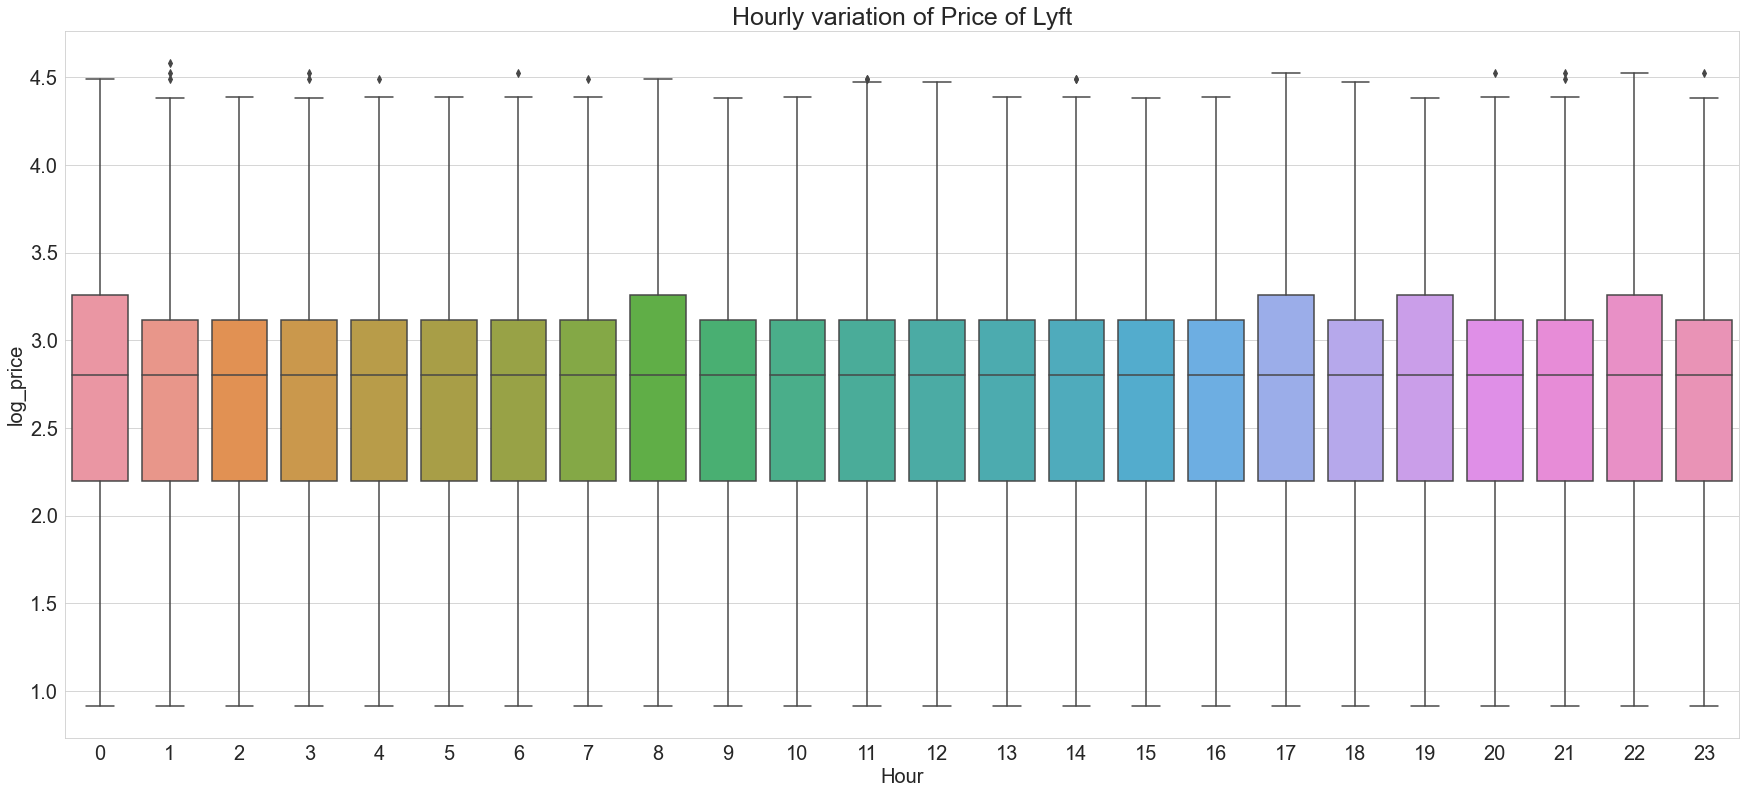

In [23]:
plt.figure(figsize=(30,13))
sns.set_style("whitegrid")
sns.boxplot(x="hour", y="log_price", data = lyft)
plt.xticks(fontsize= 20)
plt.yticks(fontsize= 20)
plt.xlabel("Hour",fontsize=20)
plt.ylabel("log_price",fontsize=20)
plt.title("Hourly variation of Price of Lyft",fontsize=25)
plt.show()


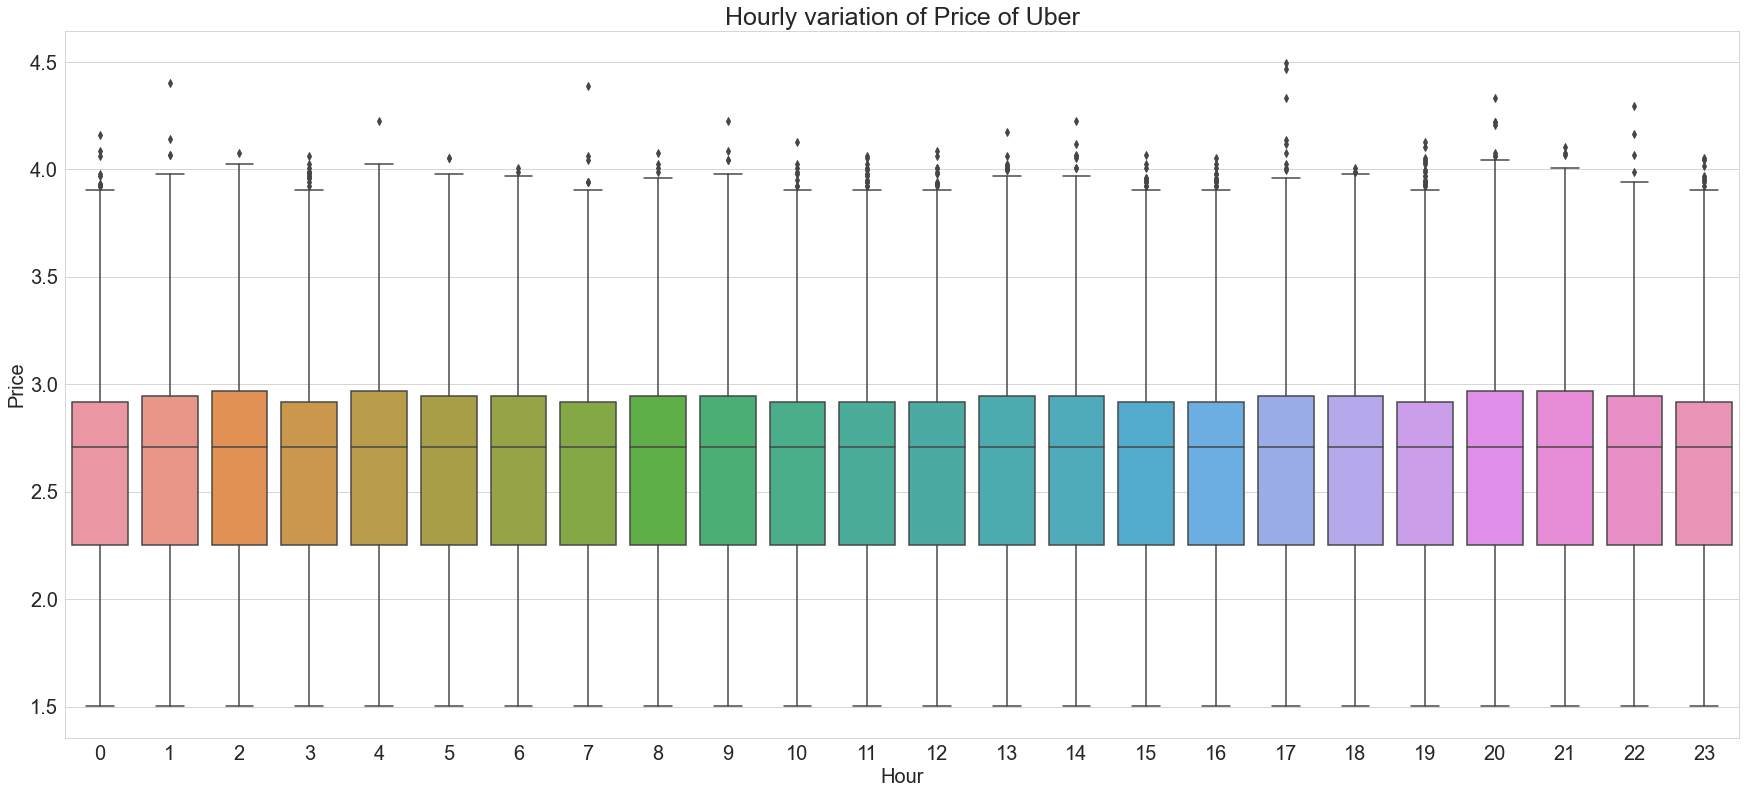

In [24]:
plt.figure(figsize=(30,13))
sns.boxplot(x= "hour", y="log_price", data= uber)
plt.yticks(fontsize = 20)
plt.xticks(fontsize = 20)
plt.xlabel("Hour", fontsize=20)
plt.ylabel("Price",fontsize=20)
plt.title("Hourly variation of Price of Uber",fontsize=25)
plt.show()

#### Plot Summary - The range of distribution of log price of Lyft is comparatively higher at hour values of 0,8,17,19 and 22. There are some outliers in Hourly variation of Price of Uber.

### Imputation with mean value

In [38]:
outlier = []
threshold = 3
m = [x for x in data["price"].values] 
mean= np.mean(m)
std= np.std(m)
for i in data["price"].values:
    zscore = (i-mean)/std
    #print(zscore)
    if zscore > threshold:
            outlier.append(zscore)
    else:
        continue
print("total number of outliers = ", len(outlier))



        
    
        

total number of outliers =  5357


In [39]:
for i in ["price"]:
    Q1,Q3 = np.percentile(data.loc[:,i], [25,75])
    IQR = Q3-Q1
    upper = Q3+(1.5*IQR)
    lower = Q1 - (1.5*IQR)
    data.loc[data[i]>upper,i]= np.nan
    data.loc[data[i]<lower,i]= np.nan
data.price.isnull().sum()

7982

In [40]:
#imputation with mean value
for i in ["price"]:
    data.loc[data.loc[:,i].isnull(),i] = data.loc[:,i].mean()
data.price.isnull().sum()

0

#### There are no more outliers after performing imputation with mean value.

### Surge Multiplier variation with Distance based on cab type

[]

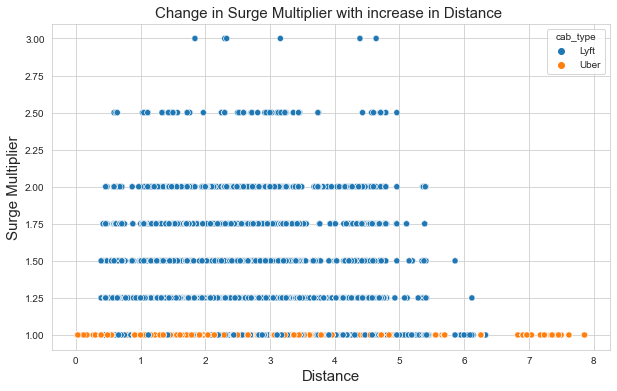

In [28]:
plt.figure(figsize=(10,6))
sns.scatterplot(x= "distance", y= "surge_multiplier",  data= data, hue = "cab_type")
plt.xlabel("Distance",fontsize=15)
plt.ylabel("Surge Multiplier",fontsize= 15)
plt.title("Change in Surge Multiplier with increase in Distance ",fontsize=15)
plt.plot()

#### Plot Summary - There is no change in surge multiplier with change in distance.

### Price variation with Surge Multiplier

<function matplotlib.pyplot.show(close=None, block=None)>

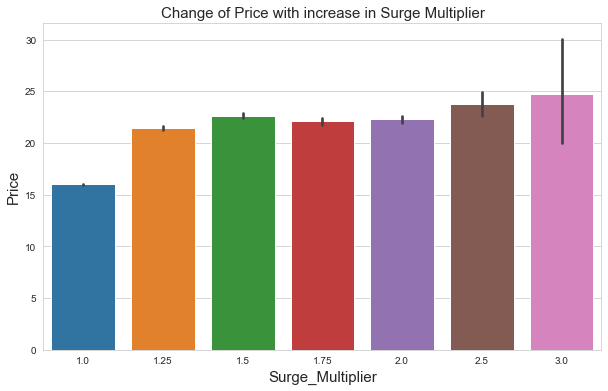

In [29]:
plt.figure(figsize=(10,6))
sns.set_style("whitegrid")
sns.barplot(x= "surge_multiplier", y="price", data= data)
plt.xlabel("Surge_Multiplier", fontsize=15)
plt.ylabel("Price",fontsize=15)
plt.title("Change of Price with increase in Surge Multiplier",fontsize=15)
plt.show

#### Plot Summary - With the increase in surge multiplier, there is increase in price. So, surge multiplier can be considered as an important feature to determine prices of cabs.

### Price variation with Time of Day based on Surge Multiplier

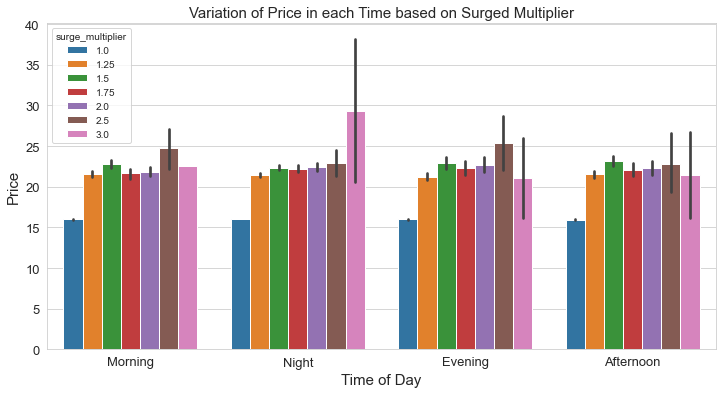

In [30]:
plt.figure(figsize=(12,6))
sns.set_style("whitegrid")
sns.barplot(x= "time_of_day", y="price",hue="surge_multiplier",data=data)
plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)
plt.xlabel("Time of Day", fontsize= 15)
plt.ylabel("Price", fontsize= 15)
plt.title("Variation of Price in each Time based on Surged Multiplier", fontsize=15)
plt.show()

#### Plot Summary - Price for cab rides is the highest during the night time when there is increase in surge multiplier. 

### Price for each Destination

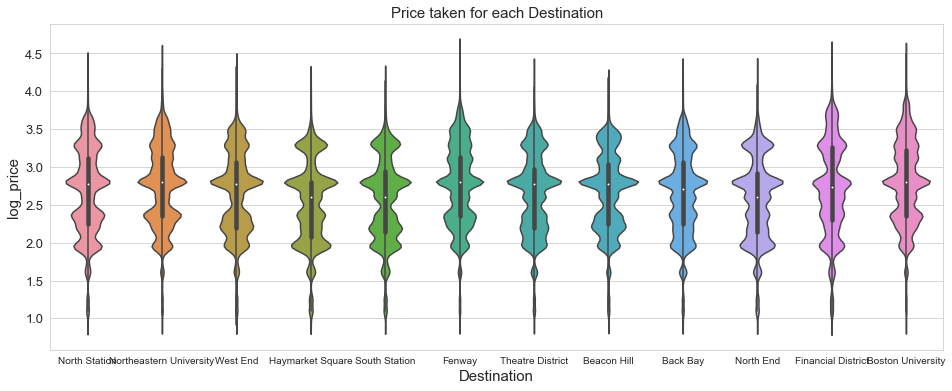

In [31]:
plt.figure(figsize=(16,6))
sns.violinplot(x= "destination", y="log_price", data= data)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 13)
plt.xlabel("Destination",fontsize=15)
plt.ylabel("log_price",fontsize=15)
plt.title("Price taken for each Destination", fontsize=15)
plt.show()

#### Plot Summary - The median values of Haymarket Square, South Station and North End are lower as compared to the other destinations.   

In [32]:
data = data.drop(["log_price"], axis = 1)

### Correlation of features

Text(0.5, 1.0, 'Heatmap')

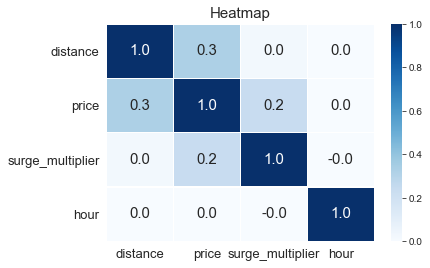

In [11]:
df= data.drop(["time_stamp"], axis=1)
sns.heatmap(df.corr(), cmap= "Blues", annot = True, fmt = '.1f',linewidths = 0.30, annot_kws={'size': 15})
plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)
plt.title("Heatmap", fontsize= 15)

#### Plot Summary - 
#### 1. Price and Hour are not correlated
#### 2. Price and distance are correlated
#### 3. Price and Surge Multiplier are correlated
#### 4. Surge Multiplier and Distance are not correlated

In [97]:
data.to_csv("cab.csv")

### Inferences and Conclusions

#### 1. EDA has been done in order to perform data analysis of the dataset. 
#### 2. From the data analysis, we can understand how the features are related to each other.
#### 3. We have converted the timestamp to date, time, hour, day and time of day.
#### 4. We have performed imputation with mean value of price to fill in the missing values and to remove outliers. 
#### 5. We have saved the processed data so that we can use it in the next jupyter notebook.  